In [7]:
def plt_allsky_healpix_img(img, ion_to_proj, xsize, dd_name, zsnap,
                           save_to_pdf, plt_coord_labels=False):
    """
    Plot the allsky healpix projection, img is result returned by
    healpix_projection(), see how to use in allsky_proj_GCview.py

    History:
    08/21/2019, YZ, UCB
    10/08/2019, YZ, Change the consistency input to match new foggie
    """

    from foggie.utils import consistency # for plotting
    import healpy as hp
    import numpy as np

    field_to_proj = consistency.species_dict[ion_to_proj]
    img_cmap = consistency.colormap_dict[field_to_proj]
    img_min = 13 # np.log10(consistency.proj_min_dict[field_to_proj])
    img_max = 23 # np.log10(consistency.proj_max_dict[field_to_proj])
    # img_label = consistency.axes_label_dict[field_to_proj]
    img_label = r'log [%s Column Density (cm$^{-2}$)]'%(ion_to_proj)

    #img_cmap = consistency.all_ion_cmaps[ion_to_proj]
    #img_min = np.log10(consistency.all_ion_cmap_min[ion_to_proj])
    #img_max = np.log10(consistency.all_ion_cmap_max[ion_to_proj])
    fig = plt.figure(figsize=(8, 4))
    hp.mollview(np.log10(img), cbar=None, cmap=img_cmap, xsize=xsize,
                min=img_min, max=img_max,
                title='%s (z=%.2f)'%(dd_name, zsnap))
    gc = plt.cm.Greys(0.8) # gc = gridcolor
    hp.graticule(color=gc)
    fs = 14

    if plt_coord_labels == True:
        hp.projtext(270, 2, r'$270\degree$', lonlat=True, fontsize=fs, color=gc)
        hp.projtext(0, 2, r'$0\degree$', lonlat=True, fontsize=fs, color=gc)
        hp.projtext(90, 2, r'$90\degree$', lonlat=True, fontsize=fs, color=gc)
        hp.projtext(30, 32, r'$30\degree$', lonlat=True, fontsize=fs, color=gc)
        hp.projtext(26, 62, r'$60\degree$', lonlat=True, fontsize=fs, color=gc)
        hp.projtext(30, -28, r'$-30\degree$', lonlat=True, fontsize=fs, color=gc)
        hp.projtext(30, -58, r'$-60\degree$', lonlat=True, fontsize=fs, color=gc)
    fig = plt.gcf()
    ax = plt.gca()
    image = ax.get_images()[0]
    # field_to_proj = consistency.species_dict[ion_to_proj]
    # img_label = 'log [%s Column Density (cm-2)]'%(ion_to_proj)
    fig.colorbar(image, ax=ax, pad=0.02, orientation='horizontal',
                 shrink=0.6, label=img_label)
    #plt.savefig(save_to_pdf)
    #plt.close()
    print("Saving to ", save_to_pdf)


In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np
import healpy as hp
from astropy.coordinates import SkyCoord
import astropy.units as u
from foggie.utils import consistency

HI4PI data

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
Saving to  figs/allsky_diff_ions/all/allsky_HI4PI_-600_+600_NHI.pdf


<Figure size 576x288 with 0 Axes>

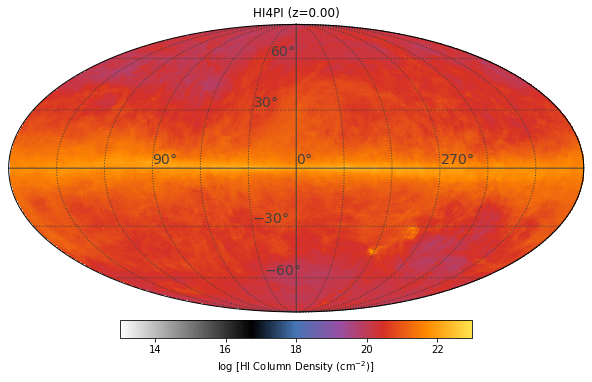

In [16]:
datafile = '/Users/Yong/Dropbox/databucket/HI4PI/NHI_maps/nhi_-600.0_600.0.hpx.fits'
nhi = hp.read_map(datafile) 
tag = 'NHI [-600, +600] km/s'

nside = hp.get_nside(nhi) # nhi or whatever readout from hp.read_map
lon, lat = hp.pix2ang(nside, np.arange(len(nhi)), lonlat=True)
# np.save('hp_glon_glat.npy', [lon lat])
# coords = SkyCoord(lon, lat, frame='galactic', unit=(u.deg, u.deg))
#ra = coords.icrs.ra.deg
#dec = coords.icrs.dec.deg

ion_to_proj = 'HI'
xsize = 800
dd_name = 'HI4PI'
zsnap = 0.0
save_to_pdf = 'figs/allsky_diff_ions/all/allsky_HI4PI_-600_+600_NHI.pdf'
img = nhi 

plt_allsky_healpix_img(img, ion_to_proj, xsize, dd_name, zsnap,
                           save_to_pdf, plt_coord_labels=True)

allsky HI from offcenter from simulation

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
Saving to  figs/allsky_diff_ions/all/allsky_offcenter_location_NHI.pdf


<Figure size 576x288 with 0 Axes>

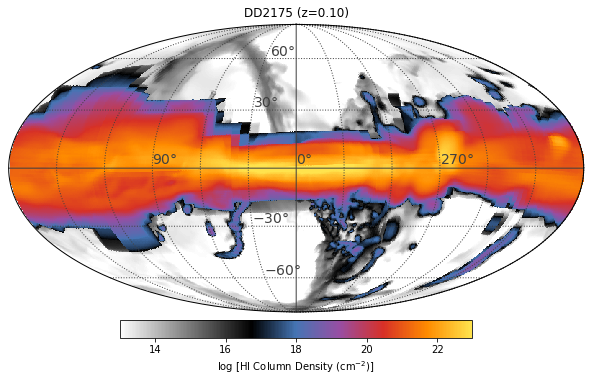

In [20]:
foggie_dir = '/Users/Yong/ForkedRepo/foggie/foggie/mocky_way/figs/allsky_diff_ions/all/fits'
sun_file = 'nref11n_nref10f_DD2175_all_offcenter_location_HI_r120.fits'

datafile = '%s/%s'%(foggie_dir, sun_file)
nhi = hp.read_map(datafile) 
tag = 'offcenter_location'

nside = hp.get_nside(nhi) # nhi or whatever readout from hp.read_map
lon, lat = hp.pix2ang(nside, np.arange(len(nhi)), lonlat=True)

ion_to_proj = 'HI'
xsize = 800
dd_name = 'DD2175'
zsnap = 0.10 
save_to_pdf = 'figs/allsky_diff_ions/all/allsky_%s_NHI.pdf'%(tag)
img = nhi 

plt_allsky_healpix_img(img, ion_to_proj, xsize, dd_name, zsnap,
                           save_to_pdf, plt_coord_labels=True)

allsky HI from galactic center

In [6]:
gc_file = 'nref11n_nref10f_DD2175_all_halo_center_HI.fits'

datafile = '%s/%s'%(foggie_dir, gc_file)
nhi = hp.read_map(datafile) 
tag = 'halo_center'

nside = hp.get_nside(nhi) # nhi or whatever readout from hp.read_map
lon, lat = hp.pix2ang(nside, np.arange(len(nhi)), lonlat=True)

ion_to_proj = 'HI'
xsize = 800
dd_name = 'DD2175'
zsnap = 0.10 
save_to_pdf = 'figs/allsky_diff_ions/all/allsky_%s_NHI.pdf'%(tag)
img = nhi 

plt_allsky_healpix_img(img, ion_to_proj, xsize, dd_name, zsnap,
                           save_to_pdf, plt_coord_labels=False)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
Saving to  figs/allsky_diff_ions/all/allsky_halo_center_NHI.pdf


/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1194: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1153: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


<Figure size 576x288 with 0 Axes>

allsky electron dispersion measure 

In [10]:
datafile = 'figs/allsky_diff_ions/all/fits/nref11n_nref10f_DD2175_all_offcenter_location_Electron_r160.fits'
e_DM = hp.read_map(datafile) *(u.cm**-2).to(u.pc/u.cm**3)
tag = 'offcenter_location'

nside = hp.get_nside(e_DM) # nhi or whatever readout from hp.read_map
lon, lat = hp.pix2ang(nside, np.arange(len(e_DM)), lonlat=True)
# np.save('hp_glon_glat.npy', [lon lat])
# coords = SkyCoord(lon, lat, frame='galactic', unit=(u.deg, u.deg))
#ra = coords.icrs.ra.deg
#dec = coords.icrs.dec.deg

ion_to_proj = 'Electron'
xsize = 800
dd_name = 'DD2175'
zsnap = 0.10
save_to_pdf = 'figs/allsky_diff_ions/all/nref11n_nref10f_DD2175_all_offcenter_location_Electron_r160_DM.pdf'
img = e_DM

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
Saving to  figs/allsky_diff_ions/all/nref11n_nref10f_DD2175_all_offcenter_location_Electron_r160_DM.pdf


/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1194: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1153: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


<Figure size 576x288 with 0 Axes>

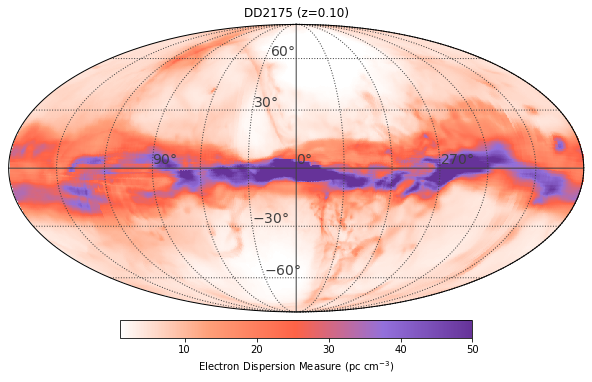

In [11]:
from foggie.utils import consistency # for plotting
import healpy as hp
import numpy as np

img_cmap = consistency.e_color_map
img_min = 1
img_max = 50
img_label = r'Electron Dispersion Measure (pc cm$^{-3}$)'

fig = plt.figure(figsize=(8, 4))
hp.mollview(img, cbar=None, cmap=img_cmap, xsize=xsize,
            min=img_min, max=img_max,
            title='%s (z=%.2f)'%(dd_name, zsnap))
gc = plt.cm.Greys(0.8) # gc = gridcolor
hp.graticule(color=gc)
fs = 14
hp.projtext(270, 2, r'$270\degree$', lonlat=True, fontsize=fs, color=gc)
hp.projtext(0, 2, r'$0\degree$', lonlat=True, fontsize=fs, color=gc)
hp.projtext(90, 2, r'$90\degree$', lonlat=True, fontsize=fs, color=gc)
hp.projtext(30, 32, r'$30\degree$', lonlat=True, fontsize=fs, color=gc)
hp.projtext(26, 62, r'$60\degree$', lonlat=True, fontsize=fs, color=gc)
hp.projtext(30, -28, r'$-30\degree$', lonlat=True, fontsize=fs, color=gc)
hp.projtext(30, -58, r'$-60\degree$', lonlat=True, fontsize=fs, color=gc)
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
# field_to_proj = consistency.species_dict[ion_to_proj]
# img_label = 'log [%s Column Density (cm-2)]'%(ion_to_proj)
fig.colorbar(image, ax=ax, pad=0.02, orientation='horizontal',
                shrink=0.6, label=img_label)
plt.savefig(save_to_pdf)
# plt.close()
print("Saving to ", save_to_pdf)